In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read in 3 datasets for Pfizer, Moderna, and Janssen
realTimeData=True # If true it will take real time data, otherwise it will take the local csv file

if realTimeData:
    # Download data and rename column
    Pfizer = pd.read_csv("https://data.cdc.gov/resource/saz5-9hgg.csv").rename(columns={"jurisdiction": "Jurisdiction", "week_of_allocations": "Week of Allocations", "_1st_dose_allocations": "1st Dose Allocations", "_2nd_dose_allocations": "2nd Dose Allocations"})
    Moderna = pd.read_csv("https://data.cdc.gov/resource/b7pe-5nws.csv").rename(columns={"jurisdiction": "Jurisdiction", "week_of_allocations": "Week of Allocations", "_1st_dose_allocations": "1st Dose Allocations", "_2nd_dose_allocations": "2nd Dose Allocations"})
    Janssen = pd.read_csv("https://data.cdc.gov/resource/w9zu-fywh.csv").rename(columns={"jurisdiction": "Jurisdiction", "week_of_allocations": "Week of Allocations", "_1st_dose_allocations": "1st Dose Allocations"})
else:
    # Load from our preprocessed data
    Pfizer = pd.read_csv("COVID-19_Vaccine_Distribution_Allocations_by_Jurisdiction_-_Pfizer.csv")
    Moderna = pd.read_csv("COVID-19_Vaccine_Distribution_Allocations_by_Jurisdiction_-_Moderna.csv")
    Janssen = pd.read_csv("COVID-19_Vaccine_Distribution_Allocations_by_Jurisdiction_-_Janssen.csv")

In [3]:
Pfizer

,Jurisdiction,Week of Allocations,1st Dose Allocations,2nd Dose Allocations
0,Connecticut,2021-04-26T00:00:00.000,54990,54990
1,Maine,2021-04-26T00:00:00.000,21060,21060
2,Massachusetts,2021-04-26T00:00:00.000,105300,105300
3,New Hampshire,2021-04-26T00:00:00.000,21060,21060
4,Rhode Island,2021-04-26T00:00:00.000,16380,16380
...,...,...,...,...
995,Rhode Island,2021-01-11T00:00:00.000,6825,6825
996,South Carolina,2021-01-11T00:00:00.000,30225,30225
997,South Dakota,2021-01-11T00:00:00.000,5850,5850
998,Tennessee,2021-01-11T00:00:00.000,39975,39975


In [4]:
Moderna

,Jurisdiction,Week of Allocations,1st Dose Allocations,2nd Dose Allocations
0,Connecticut,2021-04-26T00:00:00.000,40400,40400
1,Maine,2021-04-26T00:00:00.000,15400,15400
2,Massachusetts,2021-04-26T00:00:00.000,77700,77700
3,New Hampshire,2021-04-26T00:00:00.000,15500,15500
4,Rhode Island,2021-04-26T00:00:00.000,12100,12100
...,...,...,...,...
995,Rhode Island,2021-01-11T00:00:00.000,6600,6600
996,South Carolina,2021-01-11T00:00:00.000,29900,29900
997,South Dakota,2021-01-11T00:00:00.000,5100,5100
998,Tennessee,2021-01-11T00:00:00.000,39800,39800


In [5]:
Janssen

,Jurisdiction,Week of Allocations,1st Dose Allocations
0,Connecticut,2021-04-12T00:00:00.000,6400
1,Maine,2021-04-12T00:00:00.000,2500
2,Massachusetts,2021-04-12T00:00:00.000,12300
3,New Hampshire,2021-04-12T00:00:00.000,2500
4,Rhode Island,2021-04-12T00:00:00.000,2000
...,...,...,...
373,Alaska,2021-03-01T00:00:00.000,8900
374,Idaho,2021-03-01T00:00:00.000,13300
375,Oregon,2021-03-01T00:00:00.000,34400
376,Washington,2021-03-01T00:00:00.000,60900


In [6]:
# merge the three datasets and rename columns for readability
merged = Pfizer.merge(Moderna, how='outer', on=['Jurisdiction','Week of Allocations'])
merged = merged.merge(Janssen, how='outer', on=['Jurisdiction','Week of Allocations'])

columns = ['Jurisdiction','Week','Pfizer 1st Dose','Pfizer 2nd Dose','Moderna 1st Dose','Moderna 2nd Dose','Janssen Dose']
merged.columns = columns
merged

,Jurisdiction,Week,Pfizer 1st Dose,Pfizer 2nd Dose,Moderna 1st Dose,Moderna 2nd Dose,Janssen Dose
0,Connecticut,2021-04-26T00:00:00.000,54990,54990,40400,40400,NaN
1,Maine,2021-04-26T00:00:00.000,21060,21060,15400,15400,NaN
2,Massachusetts,2021-04-26T00:00:00.000,105300,105300,77700,77700,NaN
3,New Hampshire,2021-04-26T00:00:00.000,21060,21060,15500,15500,NaN
4,Rhode Island,2021-04-26T00:00:00.000,16380,16380,12100,12100,NaN
...,...,...,...,...,...,...,...
995,Rhode Island,2021-01-11T00:00:00.000,6825,6825,6600,6600,NaN
996,South Carolina,2021-01-11T00:00:00.000,30225,30225,29900,29900,NaN
997,South Dakota,2021-01-11T00:00:00.000,5850,5850,5100,5100,NaN
998,Tennessee,2021-01-11T00:00:00.000,39975,39975,39800,39800,NaN


In [7]:
# replace NaN values to 0 for now to represent no doses for that period
merged = merged.fillna(0)

# change week column to something more sort friendly
merged['Week'] = pd.to_datetime(merged.Week)
merged

,Jurisdiction,Week,Pfizer 1st Dose,Pfizer 2nd Dose,Moderna 1st Dose,Moderna 2nd Dose,Janssen Dose
0,Connecticut,2021-04-26,54990,54990,40400,40400,0.0
1,Maine,2021-04-26,21060,21060,15400,15400,0.0
2,Massachusetts,2021-04-26,105300,105300,77700,77700,0.0
3,New Hampshire,2021-04-26,21060,21060,15500,15500,0.0
4,Rhode Island,2021-04-26,16380,16380,12100,12100,0.0
...,...,...,...,...,...,...,...
995,Rhode Island,2021-01-11,6825,6825,6600,6600,0.0
996,South Carolina,2021-01-11,30225,30225,29900,29900,0.0
997,South Dakota,2021-01-11,5850,5850,5100,5100,0.0
998,Tennessee,2021-01-11,39975,39975,39800,39800,0.0


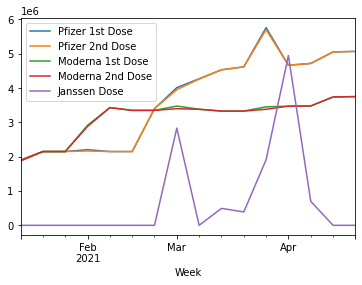

In [8]:
# quick and simple EDA to look at number of doses over times
merged.groupby('Week').sum().plot();

In [9]:
# Total dose over time by brand (Doesn't matter if it's first or second)
totalDose = merged.copy()
totalDose['Pfizer'] = totalDose['Pfizer 1st Dose'] + totalDose['Pfizer 2nd Dose']
totalDose['Moderna'] = totalDose['Moderna 1st Dose'] + totalDose['Moderna 2nd Dose']
totalDose['Janssen'] = totalDose['Janssen Dose']
totalDose=totalDose.drop(['Pfizer 1st Dose', 'Pfizer 2nd Dose', 'Moderna 1st Dose', 'Moderna 2nd Dose', 'Janssen Dose'], axis=1)
totalDose

,Jurisdiction,Week,Pfizer,Moderna,Janssen
0,Connecticut,2021-04-26,109980,80800,0.0
1,Maine,2021-04-26,42120,30800,0.0
2,Massachusetts,2021-04-26,210600,155400,0.0
3,New Hampshire,2021-04-26,42120,31000,0.0
4,Rhode Island,2021-04-26,32760,24200,0.0
...,...,...,...,...,...
995,Rhode Island,2021-01-11,13650,13200,0.0
996,South Carolina,2021-01-11,60450,59800,0.0
997,South Dakota,2021-01-11,11700,10200,0.0
998,Tennessee,2021-01-11,79950,79600,0.0


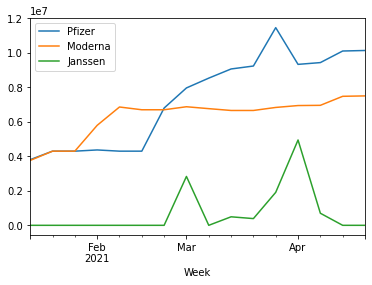

In [10]:
# quick and simple EDA to look at Total dose over time by brand
totalDose.groupby('Week').sum().plot();

            Pfizer 1st Dose  Pfizer 2nd Dose  Moderna 1st Dose  \
Week                                                             
2021-01-11            60450            60450             60300   
2021-01-18            63375            63375             63300   
2021-01-25            63375            63375             63300   
2021-02-01            62400            62400             83600   
2021-02-08            63375            63375             91300   
2021-02-15            63375            63375             98700   
2021-02-22            99450            99450             98700   
2021-03-01           114660           114660             98700   
2021-03-08           125190           125190             98700   
2021-03-15           134550           134550             98700   
2021-03-22           136890           136890             98700   
2021-03-29           167310           167310             98700   
2021-04-05           136890           136890            103100   
2021-04-12

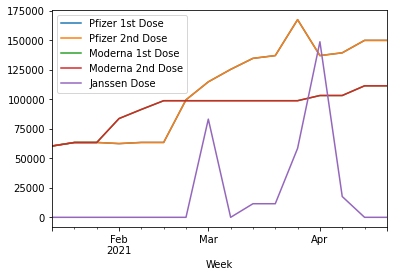

In [11]:
# Illinois's vaccine distribution data over time
illinois = merged.copy()
illinois = illinois[illinois['Jurisdiction'] == "Illinois"]
illinois.groupby('Week').sum().plot();
print(illinois.groupby('Week').sum())

Index(['California', 'Texas', 'Florida', 'Federal Entities', 'Ohio'], dtype='object', name='Jurisdiction')
Jurisdiction  California  Federal Entities    Florida      Ohio      Texas
Week                                                                      
2021-01-11      930650.0          404550.0   509650.0  279800.0   638000.0
2021-01-18      971600.0          420600.0   532200.0  292650.0   665700.0
2021-01-25      971600.0          421200.0   532200.0  292650.0   665700.0
2021-02-01     1125650.0          527230.0   615450.0  337500.0   770550.0
2021-02-08     1187400.0         1173400.0   650200.0  357450.0   813500.0
2021-02-15     1244200.0          537600.0   681200.0  374450.0   852300.0
2021-02-22     1525780.0          659280.0   834860.0  459860.0  1044960.0
2021-03-01     1958200.0          883340.0  1070800.0  588720.0  1341380.0
2021-03-08     1720000.0          843020.0   940160.0  516020.0  1178340.0
2021-03-15     1836540.0          771540.0  1004040.0  552620.0  125

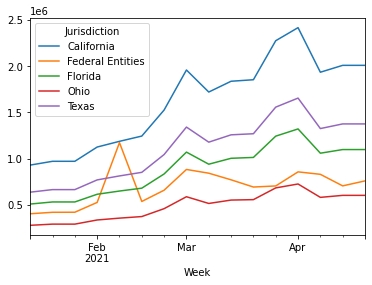

In [12]:
# Create a list to get total by week
percentageByWeek = merged.copy()
percentageByWeek = percentageByWeek.groupby('Week').sum()
percentageByWeek = percentageByWeek.rename(columns={"Pfizer 1st Dose": "Pfizer 1st Dose Total", 
                                 "Pfizer 2nd Dose": "Pfizer 2nd Dose Total", 
                                 "Moderna 1st Dose": "Moderna 1st Dose Total", 
                                 "Moderna 2nd Dose": "Moderna 2nd Dose Total", 
                                 "Janssen Dose": "Janssen Dose Total"})

# Join data with the original data, so we get calculate the percentage for each column
percentage = merged.copy()
percentage = percentage.join(percentageByWeek, on='Week')
percentage["Pfizer 1st Dose %"] = percentage["Pfizer 1st Dose"] / percentage["Pfizer 1st Dose Total"] * 100
percentage["Pfizer 2nd Dose %"] = percentage["Pfizer 2nd Dose"] / percentage["Pfizer 2nd Dose Total"] * 100
percentage["Moderna 1st Dose %"] = percentage["Moderna 1st Dose"] / percentage["Moderna 1st Dose Total"] * 100
percentage["Moderna 2nd Dose %"] = percentage["Moderna 2nd Dose"] / percentage["Moderna 2nd Dose Total"] * 100
percentage["Janssen Dose %"] = percentage["Janssen Dose"] / percentage["Janssen Dose Total"] * 100
percentage = percentage[["Jurisdiction","Week",
                         "Pfizer 1st Dose %", "Pfizer 2nd Dose %",
                         "Moderna 1st Dose %", "Moderna 2nd Dose %",
                         "Janssen Dose %"]].fillna(0)
#print(percentage.groupby('Jurisdiction').sum().sort_values(by=['Pfizer 1st Dose %', 'Pfizer 2nd Dose %'], ascending=False).head(5).index)
top5 = percentage.groupby('Jurisdiction').sum().sort_values(by=['Pfizer 1st Dose %', 'Pfizer 2nd Dose %'], ascending=False).head(5).index

print(top5)
top5Result = merged.copy()
top5Result = top5Result[top5Result['Jurisdiction'].isin(top5)]

top5Result["Total"] = (top5Result["Pfizer 1st Dose"] + top5Result["Pfizer 2nd Dose"] + top5Result["Moderna 1st Dose"] + top5Result["Moderna 2nd Dose"] + top5Result["Janssen Dose"])
top5Result = top5Result[["Jurisdiction", "Week", "Total"]]
top5Result = top5Result.pivot(index="Week", columns='Jurisdiction')["Total"] # Flip to match plot format
top5Result.plot()
print(top5Result)

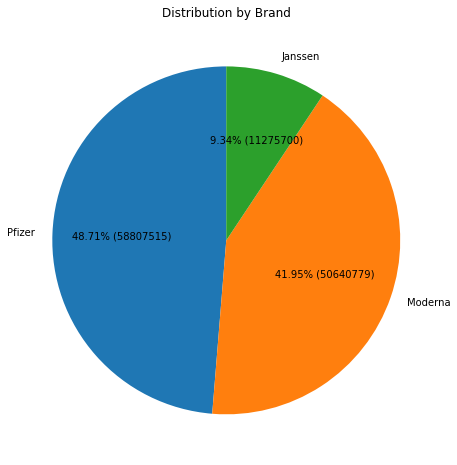

In [13]:
data = merged.copy()
pfizerCount=data["Pfizer 1st Dose"].sum()
modernaCount=data["Moderna 1st Dose"].sum()
janssenCount=data["Janssen Dose"].sum()

plt.figure(figsize=(8,8))
plt.title("Distribution by Brand")
counts = [pfizerCount, modernaCount, janssenCount]
labels = ["Pfizer", "Moderna", "Janssen"]
plt.pie(counts, labels=labels, autopct=lambda p:f'{p:.2f}% ({p*sum(counts)/100 :.0f})', startangle=90)
plt.show()